## YOLO  

**YOLO (You Only Look Once)** is a state-of-the-art, real-time object detection algorithm.  

### 🔹 What is YOLO?  
YOLO is a **deep learning model** used for **object detection**. Instead of scanning an image multiple times, it looks at the image **just once** and predicts all objects along with their locations and classes.  

---

### 🔹 How YOLO Works  
1. **Single Forward Pass**  
   - YOLO divides the image into a grid.  
   - Each grid cell predicts bounding boxes, object presence (confidence), and class probabilities.  

2. **Bounding Box Prediction**  
   - Each box is represented by `(x, y, width, height)` relative to the image.  

3. **Confidence Score**  
   - Tells how likely an object exists in the box.  

4. **Class Prediction**  
   - Identifies what the object is (e.g., car, person, dog).  

5. **Non-Maximum Suppression (NMS)**  
   - Removes duplicate boxes to keep the best predictions.  

---

### 🔹 What YOLO Does  
- Detects multiple objects in **real-time**.  
- Provides both **object classification** and **localization**.  
- Used in:  
  - Self-driving cars 🚗  
  - Video surveillance 📹  
  - Medical imaging 🏥  
  - Robotics 🤖  
  - Smart retail 🛍️  

---

✅ **In short:**  
YOLO is fast, efficient, and accurate, making it one of the most popular algorithms for real-time object detection.  


In [5]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import json


Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\786\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
INPUT_IMAGE = "sample.png"          # <- change to your image file path
OUTPUT_IMAGE = "output_annotated.jpg"
MODEL_NAME = "yolov8n.pt"         # yolov8n, yolov8s, yolov8m, etc.
CONF_THRESH = 0.25
IMGSZ = 640


In [7]:
model = YOLO(MODEL_NAME)  # downloads weights automatically if needed
print("Loaded model:", MODEL_NAME)
print("Available classes (partial):", {k: v for k, v in list(model.names.items())[:10]})



Loaded model: yolov8n.pt
Available classes (partial): {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light'}


In [8]:
results = model.predict(source=INPUT_IMAGE, imgsz=IMGSZ, conf=CONF_THRESH, save=False)
res = results[0]   # first (and only) image result



image 1/1 c:\Users\786\Desktop\Sessions\MachineLearning & DeepLearning\09-Yolo_Object-Detection\sample.png: 448x640 1 person, 4 cars, 249.2ms
Speed: 17.3ms preprocess, 249.2ms inference, 7.6ms postprocess per image at shape (1, 3, 448, 640)


In [9]:
# cell
detections = []
for box in res.boxes:
    # xyxy, conf, cls are available on each box
    xyxy = box.xyxy.cpu().numpy().tolist()[0]   # [x1, y1, x2, y2]
    conf = float(box.conf.cpu().numpy()[0]) if hasattr(box, "conf") else float(box.conf)
    cls_idx = int(box.cls.cpu().numpy()[0]) if hasattr(box, "cls") else int(box.cls)
    label = model.names.get(cls_idx, str(cls_idx))
    detections.append({
        "label": label,
        "class_id": cls_idx,
        "confidence": round(conf, 4),
        "x1": int(xyxy[0]),
        "y1": int(xyxy[1]),
        "x2": int(xyxy[2]),
        "y2": int(xyxy[3]),
    })

df = pd.DataFrame(detections)
if df.empty:
    print("No detections above confidence threshold.")
else:
    display(df)   # in Jupyter this shows a nice table


,label,class_id,confidence,x1,y1,x2,y2
0,car,2,0.8576,0,1911,606,3863
1,car,2,0.8356,679,2021,1687,2849
2,person,0,0.8226,1302,1239,4544,3961
3,car,2,0.4377,234,2057,766,2482
4,car,2,0.4301,1488,2004,2141,2385


Annotated image saved to: output_annotated.jpg


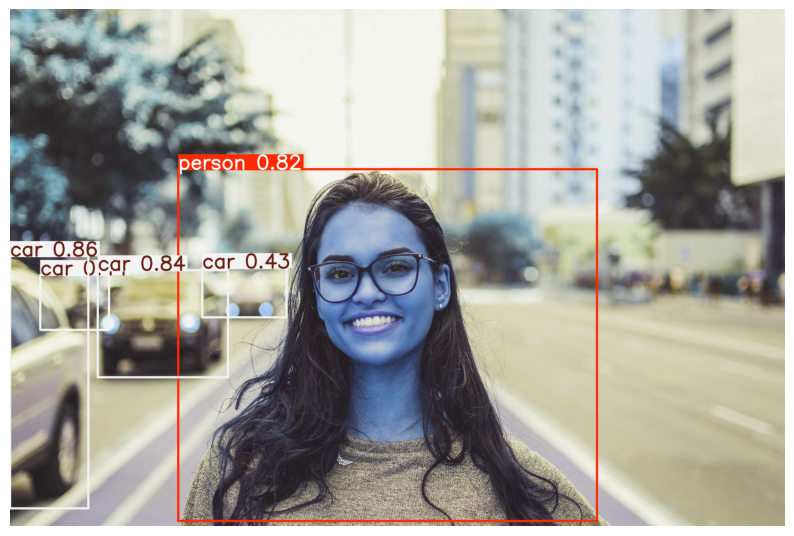

In [10]:
# cell
try:
    annotated_rgb = res.plot()  # returns an RGB numpy array with drawn boxes/labels
    # convert RGB -> BGR for OpenCV saving
    annotated_bgr = cv2.cvtColor(annotated_rgb, cv2.COLOR_RGB2BGR)
    cv2.imwrite(OUTPUT_IMAGE, annotated_bgr)
    print("Annotated image saved to:", OUTPUT_IMAGE)

    # Show inline (convert back to RGB for matplotlib)
    img_show = cv2.cvtColor(annotated_bgr, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(img_show)
    plt.axis("off")
    plt.show()

except Exception as e:
    print("Failed to auto-plot annotated image:", e)
    # Fallback: draw using OpenCV
    img = cv2.imread(INPUT_IMAGE)
    for det in detections:
        cv2.rectangle(img, (det["x1"], det["y1"]), (det["x2"], det["y2"]), (0,255,0), 2)
        cv2.putText(img, f'{det["label"]} {det["confidence"]:.2f}', (det["x1"], max(15, det["y1"]-5)),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1)
    cv2.imwrite(OUTPUT_IMAGE, img)
    # show:
    img_show = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(img_show)
    plt.axis("off")
    plt.show()


In [11]:
# cell
out_json = {"input": INPUT_IMAGE, "output": OUTPUT_IMAGE, "detections": detections}
with open("detection_results.json", "w") as f:
    json.dump(out_json, f, indent=2)
print("Saved detection_results.json")


Saved detection_results.json
